Apporoach to loaan prediction

1. Import libraries
2. Load and Audit the data
3. Data preparation and Data transformation
      - Missing values: Impute all missing values using mean,mode,median.
      - Inconsistant values: Replace all inconsistances with consistent values
      - Outliers: Transform or let the algorithm deal
4. Data visualization
5. Data analysis
      - Uni-Variate Analysis(Mean,Mode,Median,Skewness)
      - Bi-Variate Analysis(Corelation,covariance,Chi-Sqare test)
      - Multi-Variate
                1. 
       

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy import stats



Load the data and audit the data

In [2]:
train = pd.read_csv('/content/train_ctrUa4K (1).csv')

In [3]:
test = pd.read_csv("/content/test_lAUu6dG (1).csv")

Audit the data

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [6]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
train.skew()

<ipython-input-7-1d3a3c99b9d6>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.skew()


ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

<AxesSubplot:>

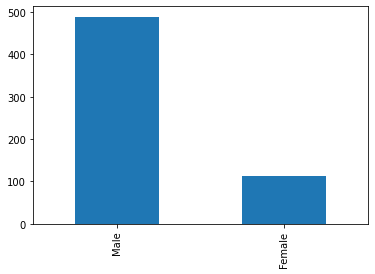

In [8]:
train['Gender'].value_counts().plot(kind='bar')

<AxesSubplot:>

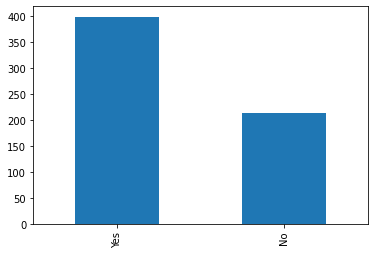

In [9]:
train['Married'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Dependents'>

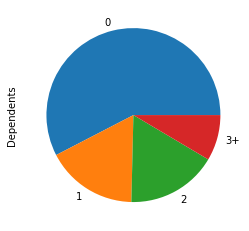

In [10]:
train['Dependents'].value_counts().plot(kind='pie')

<AxesSubplot:>

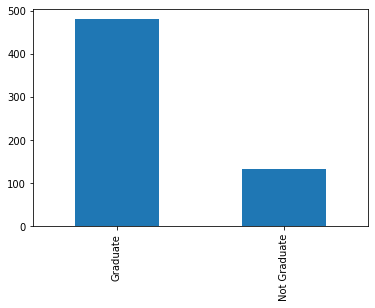

In [11]:
train['Education'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Self_Employed'>

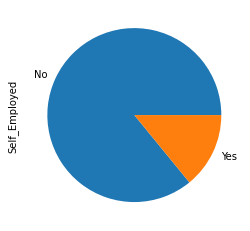

In [12]:
train['Self_Employed'].value_counts().plot(kind='pie')

<AxesSubplot:>

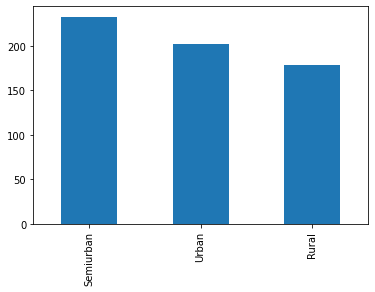

In [13]:
train['Property_Area'].value_counts().plot(kind='bar')

<AxesSubplot:>

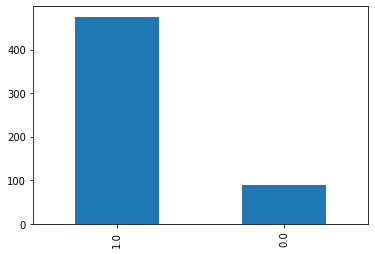

In [14]:
train['Credit_History'].value_counts().plot(kind='bar')

Data Preparation UDF

In [15]:
def data_prep(data):
  data['Gender'] = np.where(data['Gender'].isna(),data['Gender'].mode(dropna=True),data['Gender'])
  data['Married'] = np.where(data['Married'].isna(),data['Married'].mode(dropna=True),data['Married'])
  data['Dependents'].replace('3+', 3, inplace = True)
  data['Dependents'] = np.where(data['Dependents'].isna(),data['Dependents'].mode(dropna=True),data['Dependents'])
  data['Dependents'] = data['Dependents'].astype('int')
  data['Education'] = np.where(data['Education'].isna(),data['Education'].mode(dropna=True),data['Education'])
  data['Property_Area'] = np.where(data['Property_Area'].isna(),data['Property_Area'].mode(dropna=True),data['Property_Area'])
  data['Self_Employed'] = np.where(data['Self_Employed'].isna(),data['Self_Employed'].mode(dropna=True),data['Self_Employed'])
  data['Credit_History'] = np.where(data['Credit_History'].isna(),data['Credit_History'].mode(dropna=True),data['Credit_History'])
  for i in data.columns:
    if data[i].dtype == "float":
      data[i] = np.where(data[i].isna(),data[i].median(skipna=True),data[i])

  return data

  



In [16]:
data_prep(train)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


Drop Loan_ID

In [18]:
train.drop(['Loan_ID'], axis=1, inplace=True)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 57.7+ KB


Encode the variables

In [34]:
def encode(data):
  le = LabelEncoder()
  for i in data.columns:
    if data[i].dtype == 'object':
      data[i] = le.fit_transform(data[i])
  return data


In [36]:
encode(train)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [38]:
train.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.001963,0.540556


In [39]:
from scipy.stats import chi2_contingency
def chi_sq(var1,var2):
  table = pd.crosstab(var1,var2)
  _,p,_,_ = chi2_contingency(table)
  if p<= 0.05:
    print('Accept the alternative hypothesis',round(p,2))
  else:
    print("Failed to reject the null hypothesis", round(p,2))
  return table


    - Null hypothesis: var1 and var2 is independent
    - Alternative Hypothesis: var1 and var2 is dependent

In [40]:
chi_sq(train['Gender'],train['Loan_Status'])

Failed to reject the null hypothesis 0.74


Loan_Status,0,1
Gender,,
0,37,75
1,155,347


In [41]:
chi_sq(train['Education'],train['Loan_Status'])

Accept the alternative hypothesis 0.04


Loan_Status,0,1
Education,,
0,140,340
1,52,82


In [42]:
chi_sq(train['Credit_History'],train['Loan_Status'])

Accept the alternative hypothesis 0.0


Loan_Status,0,1
Credit_History,,
0.0,82,7
1.0,110,415


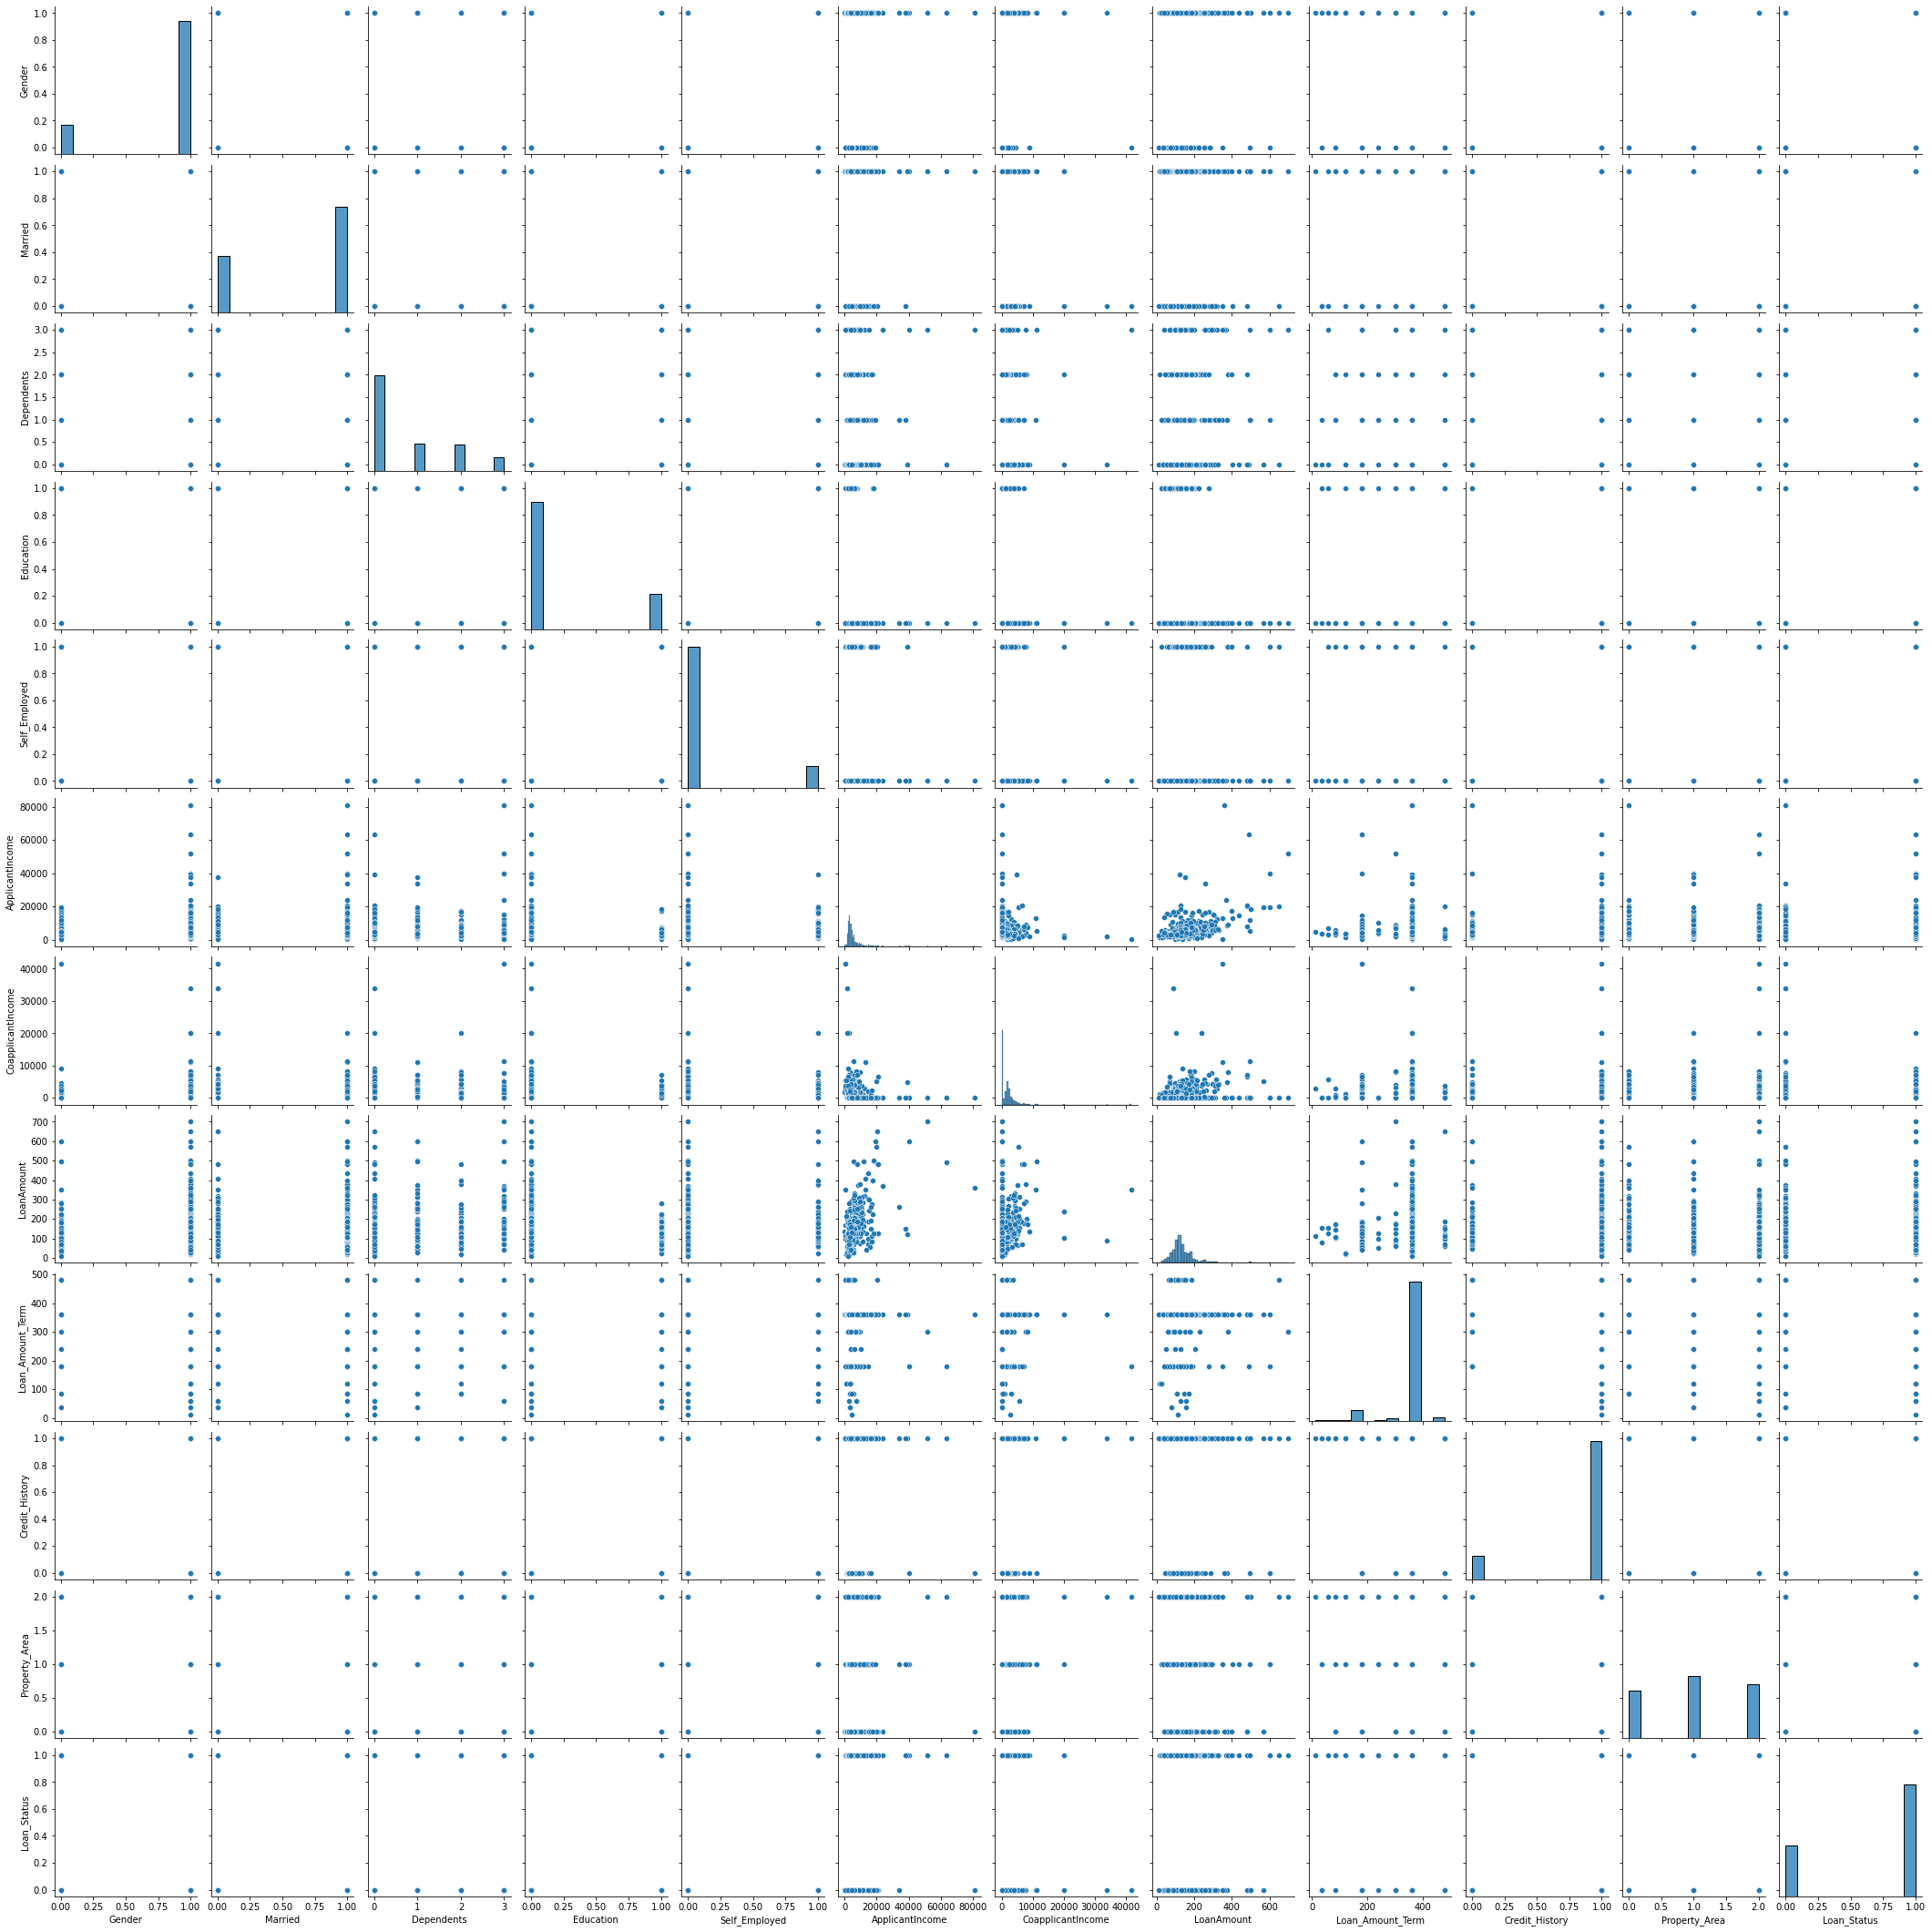

In [43]:
sns.pairplot(train)

Split train data into train and test

In [44]:
x = train.drop(['Loan_Status'], axis = 1)
y = train['Loan_Status']

In [45]:
print(x.shape)
print(y.shape)

(614, 11)
(614,)


In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [61]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(491, 11)
(123, 11)
(123,)
(491,)


In [62]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred_ytrain_lr = lr.predict(x_train)
pred_ytest_lr = lr.predict(x_test) 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
def acc_report(actual,predicted):
  acc_score = accuracy_score(actual,predicted)
  cm_matrix = confusion_matrix(actual,predicted)
  class_rep = classification_report(actual,predicted)
  print("The accuracy is ", round(acc_score,2))
  print(cm_matrix)
  print(class_rep)


In [64]:
acc_report(y_train,pred_ytrain_lr)

The accuracy is  0.81
[[ 71  88]
 [  7 325]]
              precision    recall  f1-score   support

           0       0.91      0.45      0.60       159
           1       0.79      0.98      0.87       332

    accuracy                           0.81       491
   macro avg       0.85      0.71      0.74       491
weighted avg       0.83      0.81      0.78       491



In [65]:
acc_report(y_test,pred_ytest_lr)

The accuracy is  0.81
[[15 18]
 [ 5 85]]
              precision    recall  f1-score   support

           0       0.75      0.45      0.57        33
           1       0.83      0.94      0.88        90

    accuracy                           0.81       123
   macro avg       0.79      0.70      0.72       123
weighted avg       0.81      0.81      0.80       123



Bias Variance Trads Off              
              -  bias is high model accuracy
              - variance is low model accuracy in test and train
              - low bias and high variance is overfitting
              - adv of logistic regression is it has low varaince



In [ ]:
lr.predict_proba(x_train)

Decision Tree Implementation

In [83]:
  dtree = DecisionTreeClassifier(max_depth = 3,min_samples_split = 4)
  dtree.fit(x_train,y_train)
  preds_dtree_train = dtree.predict(x_train)
  preds_dtree_test = dtree.predict(x_test)


In [84]:
acc_report(y_train,preds_dtree_train)

The accuracy is  0.82
[[ 75  84]
 [  5 327]]
              precision    recall  f1-score   support

           0       0.94      0.47      0.63       159
           1       0.80      0.98      0.88       332

    accuracy                           0.82       491
   macro avg       0.87      0.73      0.75       491
weighted avg       0.84      0.82      0.80       491



In [85]:
acc_report(y_test,preds_dtree_test)

The accuracy is  0.79
[[14 19]
 [ 7 83]]
              precision    recall  f1-score   support

           0       0.67      0.42      0.52        33
           1       0.81      0.92      0.86        90

    accuracy                           0.79       123
   macro avg       0.74      0.67      0.69       123
weighted avg       0.77      0.79      0.77       123



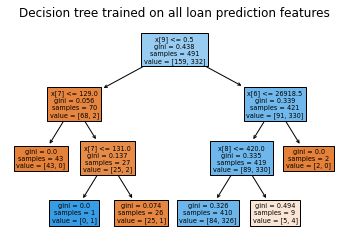

In [87]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure()
clf = DecisionTreeClassifier(max_depth = 3).fit(x_train,y_train)
plot_tree(clf,filled=True)
plt.title("Decision tree trained on all loan prediction features")
plt.show()
plt.figsize

Random Forest Model

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rf = RandomForestClassifier(n_estimators = 20,max_depth=3, verbose = 1)
rf.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished


RandomForestClassifier(max_depth=3, n_estimators=20, verbose=1)

In [95]:
preds_rf_train = rf.predict(x_train)
preds_rf_test = rf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


In [96]:
acc_report(y_train,preds_rf_train)

The accuracy is  0.81
[[ 70  89]
 [  2 330]]
              precision    recall  f1-score   support

           0       0.97      0.44      0.61       159
           1       0.79      0.99      0.88       332

    accuracy                           0.81       491
   macro avg       0.88      0.72      0.74       491
weighted avg       0.85      0.81      0.79       491



In [97]:
acc_report(y_test,preds_rf_test)

The accuracy is  0.8
[[14 19]
 [ 5 85]]
              precision    recall  f1-score   support

           0       0.74      0.42      0.54        33
           1       0.82      0.94      0.88        90

    accuracy                           0.80       123
   macro avg       0.78      0.68      0.71       123
weighted avg       0.80      0.80      0.79       123

